# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

As a car dealership it is paramount to deeply understand pricing for a given car, given its conditions. If the product is overpriced you run the risk of not attracting customers and loosing their trust. If it is sold too cheaply on the other hand then you are leaving money on the table and putting your profit margins at risk. Thus a model that could predict the right price based on data from hundreds of thousands of vehicles and the features that contribute to that price is a valuable business deliverable. 

In order to better determine what combination of features is valued the most by customers we will study the relationship between the features of the vehicles dataframe inported in this notebook and curated from a larger dataset in Kaggle. Not all features in the dataset are useful or complete so we will need to prepare the data before we can create a model against it.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

To better get a better understanding of the data we will investigate:
- missing values in any given dataset feature.
- what types of values are the features.
- can the feature values be aggregated or otherwise transformed to prepare for better modeling?

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

For an initial exploration see file: https://github.com/elmunoz42/used-car-inventory-optimizer/blob/main/used-car-inventory-exploration.ipynb in this repository


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import functions
data = pd.read_csv('data/vehicles.csv')
data

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [25]:
# Drop some tables that are not needed:
data = data.drop(['VIN','id','region'], axis=1)

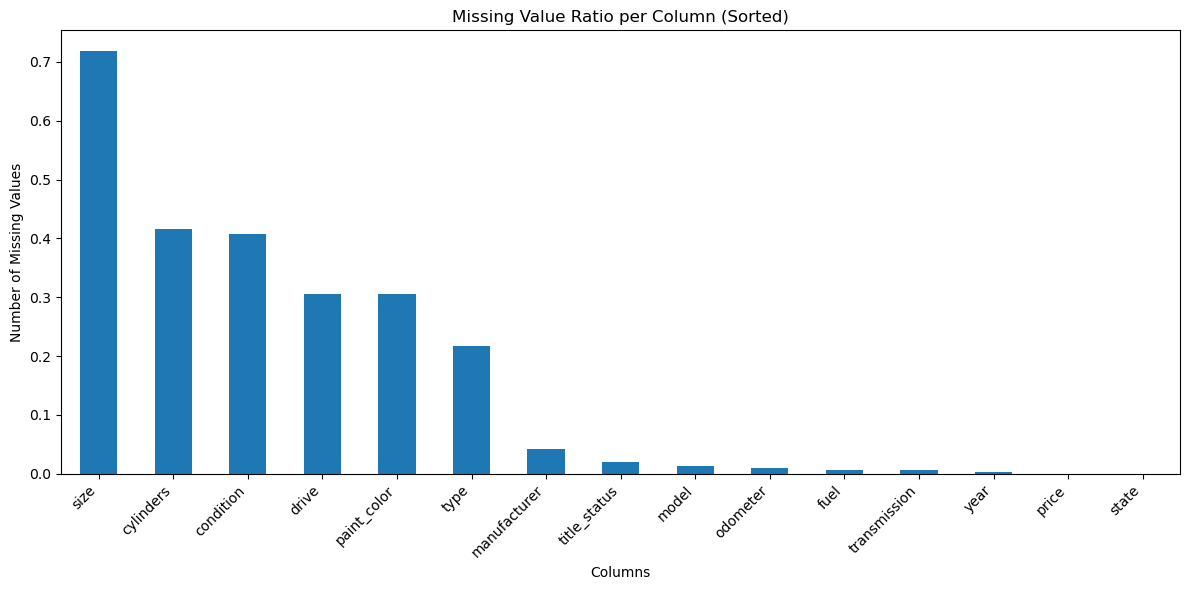

<Figure size 640x480 with 0 Axes>

In [26]:
# From functions.py file
functions.plot_dataframe_missing_values(data, 'images/fig1.jpg')

In [37]:
# For features with a lot of missing values replace NaN with "unknown"
data['size'] = data['size'].fillna('unknown')
data['cylinders'] = data['cylinders'].fillna('unknown')
data['condition'] = data['condition'].fillna('unknown')
data['drive'] = data['drive'].fillna('unknown')
data['paint_color'] = data['paint_color'].fillna('uknown')
data['type'] = data['type'].fillna('unknown')


In [38]:
# For features with less than 10% missing data remove rows
data = data.dropna(subset=['manufacturer', 'model', 'price', 'odometer', 'fuel', 
                           'transmission', 'year', 'type', 'state'])

# Reset the index if needed
data = data.reset_index(drop=True)


   price    year manufacturer                     model  condition  \
0  33590  2014.0          gmc  sierra 1500 crew cab slt       good   
1  22590  2010.0    chevrolet            silverado 1500       good   
2  39590  2020.0    chevrolet       silverado 1500 crew       good   
3  30990  2017.0       toyota      tundra double cab sr       good   
4  15000  2013.0         ford                 f-150 xlt  excellent   

     cylinders fuel  odometer title_status transmission    drive       size  \
0  8 cylinders  gas   57923.0        clean        other  unknown    unknown   
1  8 cylinders  gas   71229.0        clean        other  unknown    unknown   
2  8 cylinders  gas   19160.0        clean        other  unknown    unknown   
3  8 cylinders  gas   41124.0        clean        other  unknown    unknown   
4  6 cylinders  gas  128000.0        clean    automatic      rwd  full-size   

     type paint_color state  
0  pickup       white    al  
1  pickup        blue    al  
2  pickup     

In [45]:
# As can bee seen in the used-car-inventory-exploration.ipynb file there are upwards of 29k models in the dataset so that feature is just not practical for our efforts.

# Remove car model feature
data.drop('model', axis=1, inplace=True)

# Print the shape of the DataFrame to see how many features
print(data.head())

   price    year manufacturer  condition    cylinders fuel  odometer  \
0  33590  2014.0          gmc       good  8 cylinders  gas   57923.0   
1  22590  2010.0    chevrolet       good  8 cylinders  gas   71229.0   
2  39590  2020.0    chevrolet       good  8 cylinders  gas   19160.0   
3  30990  2017.0       toyota       good  8 cylinders  gas   41124.0   
4  15000  2013.0         ford  excellent  6 cylinders  gas  128000.0   

  title_status transmission    drive       size    type paint_color state  
0        clean        other  unknown    unknown  pickup       white    al  
1        clean        other  unknown    unknown  pickup        blue    al  
2        clean        other  unknown    unknown  pickup         red    al  
3        clean        other  unknown    unknown  pickup         red    al  
4        clean    automatic      rwd  full-size   truck       black    al  


In [46]:
# identify the numeric and categorical features
numeric_features, categorical_features = functions.identify_feature_types(data)

print(f'Numeric Features: {numeric_features}')
print(f'Categorical Features: {categorical_features}')

Numeric Features: ['year', 'odometer']
Categorical Features: ['manufacturer', 'condition', 'cylinders', 'fuel', 'title_status', 'transmission', 'drive', 'size', 'type', 'paint_color', 'state']


In [57]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
# from sklearn.compose import make_column_transformer, make_column_selector

# print(X_train.head())
# sys.exit("Stopping the script")



# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first', sparse=False), categorical_features)
    ])

# Fit the preprocessor to your data
preprocessor.fit(data)

# Transform the data
data_preprocessed = preprocessor.transform(data)

# Convert the preprocessed data to a DataFrame
# Get feature names from the preprocessor
feature_names = (numeric_features + 
                 preprocessor.named_transformers_['cat']
                 .get_feature_names_out(categorical_features).tolist())

# Create the DataFrame
data_pre = pd.DataFrame(data_preprocessed, columns=feature_names, index=data.index)

# If you want to include the target variable (assuming it's 'price')
if 'price' in data.columns:
    data_pre['price'] = data['price']

print(data_pre.head())
print(data_pre.shape)

/home/elmunoz42/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


       year  odometer  manufacturer_alfa-romeo  manufacturer_aston-martin  \
0  0.275167 -0.201579                      0.0                        0.0   
1 -0.190165 -0.131525                      0.0                        0.0   
2  0.973165 -0.405660                      0.0                        0.0   
3  0.624166 -0.290023                      0.0                        0.0   
4  0.158834  0.167365                      0.0                        0.0   

   manufacturer_audi  manufacturer_bmw  manufacturer_buick  \
0                0.0               0.0                 0.0   
1                0.0               0.0                 0.0   
2                0.0               0.0                 0.0   
3                0.0               0.0                 0.0   
4                0.0               0.0                 0.0   

   manufacturer_cadillac  manufacturer_chevrolet  manufacturer_chrysler  ...  \
0                    0.0                     0.0                    0.0  ...   
1   

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import joblib
import sys


# Assume 'price' is your target variable
X = data_pre.drop('price', axis=1)
y = data_pre['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create pipeline
model = Pipeline([
    ('regressor', Ridge())
])

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print(y_pred)
# sys.exit("Stopping the script")

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Save the model
joblib.dump(model, 'ridge_model.joblib')

[  38267.54102696   42213.64590258  -30904.18823009 ...   19956.37016397
 -144027.8906243    53646.36673642]
Mean Squared Error: 307503274976714.06
R-squared Score: 8.087722405114572e-05


['ridge_model.joblib']

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.